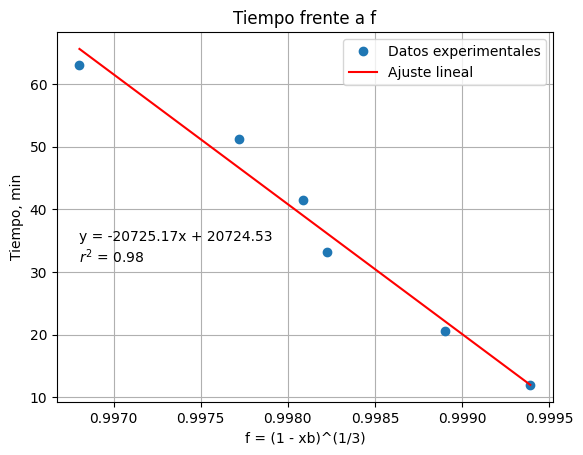

,"t1 , min",mi1,mf1,xb,f,dpb mol/L,ks m/min
0,12.000,1.0430,1.0411,0.001822,0.999392,0.054732,9.07e-07
1,20.500,1.0045,1.0012,0.003285,0.998904,0.054732,9.07e-07
2,33.166,1.0546,1.0490,0.005310,0.998227,0.054732,9.07e-07
3,41.500,1.0296,1.0237,0.005730,0.998086,0.054732,9.07e-07
4,51.166,1.0122,1.0053,0.006817,0.997723,0.054732,9.07e-07
5,63.000,1.0255,1.0157,0.009556,0.996804,0.054732,9.07e-07


In [14]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from IPython.display import display
from scipy.stats import linregress
from scipy.stats import gmean

t1 = np.array([12,20.50,33.166,41.5,51.166,63])
mi1 = np.array([1.043,1.0045,1.0546,1.0296,1.0122,1.0255]) # g      
mf1 = np.array([1.0411,1.0012,1.0490,1.0237,1.0053,1.0157]) # g
n1bola = 6
xb = (mi1 - mf1)/mi1
f = (1-xb)**(1/3)
slope, intercept, r_value, p_value, std_err = linregress(f,t1)

plt.plot(f, t1, 'o', label='Datos experimentales')
plt.plot(f, intercept + slope * f, 'r', label='Ajuste lineal')
plt.text(min(f), max(t1) * 0.5, f'y = {slope:.2f}x + {intercept:.2f}\n$r^2$ = {r_value**2:.2f}', fontsize=10)
plt.xlabel('f = (1 - xb)^(1/3)')
plt.ylabel('Tiempo, min')
plt.title('Tiempo frente a f')
plt.legend()
plt.grid()
plt.show()

tau = -slope # s 
densidad = 11.34 # g/cm³
Mw = 207.19 # g/mol
rp = 1e-3 # m
vpb = (4*np.pi*rp**3)*1000/3 # dm³
dpb = (vpb*densidad/Mw)/vpb # mol/L
hno3 = (1.411*0.65*0.05)/63.01 # mol/L

ks = dpb*rp/tau/4/hno3
df = pd.DataFrame({'t1 , min':t1,'mi1':mi1,'mf1':mf1,'xb':xb,'f':f,'dpb mol/L':dpb,'ks m/min':ks}) 
df['ks m/min'] = df['ks m/min'].apply(lambda x: '{:.2e}'.format(x))
display(df)

